# 데이터 전처리


- 데이터를 분석에 사용할 때 성능이 더 좋게 나오도록 데이터를 수정하거나 형태를 변형하는 작업
- data preprocessing

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.33.49.png?raw=1" width=500  align='left'>  



## 데이터 전처리 종류

- 데이터 클리닝 - 결측치 처리, 틀린값 처리
- 스케일링 - 여러 변수 값의 범위를 동등한 조건으로 맞추는 것: 표준 스케일링, min-max 스케일링
- 이상치 처리 - 이상치 탐지 및 제거
- 데이터 변환 - 로그 변환, 카테고리 인코딩 등

# 데이터
- 키와 몸무게 데이터 생성
- 평균 170cm, 65kg, 표준편차 4cm, 5kg

## import

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# matplotlib를 이용하여 다양한 시각화 함수를 제공하는 라이브러리 seaborn
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## 데이터 생성
- 임의의 키, 몸무게 데이터 생성

In [29]:
n_samples = 100
height = 4*np.random.randn(n_samples).round(2) + 170
weight = 5*np.random.randn(n_samples).round(2) + 65
df_raw = pd.DataFrame({"height": height, "weight": weight})
df_raw[:5]

,height,weight
0,174.20,64.40
1,164.44,59.15
2,174.04,68.20
3,167.24,65.90
4,164.88,63.45


array([[<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>]], dtype=object)

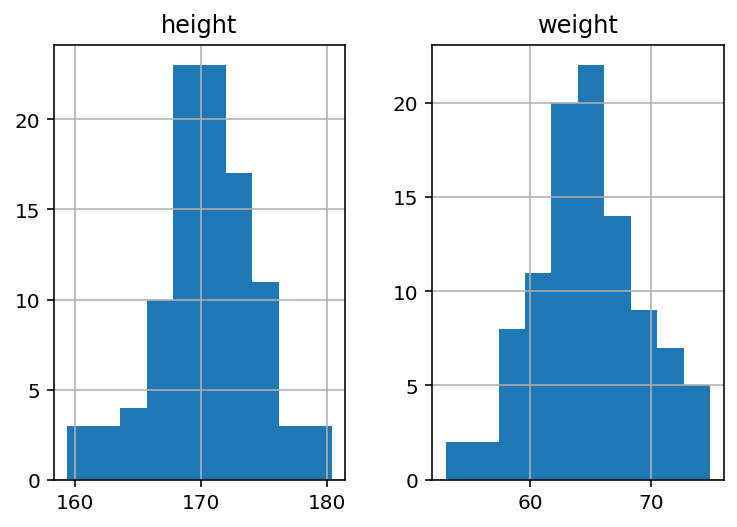

In [30]:
df = df_raw.copy()
df.hist()

<AxesSubplot:ylabel='Density'>

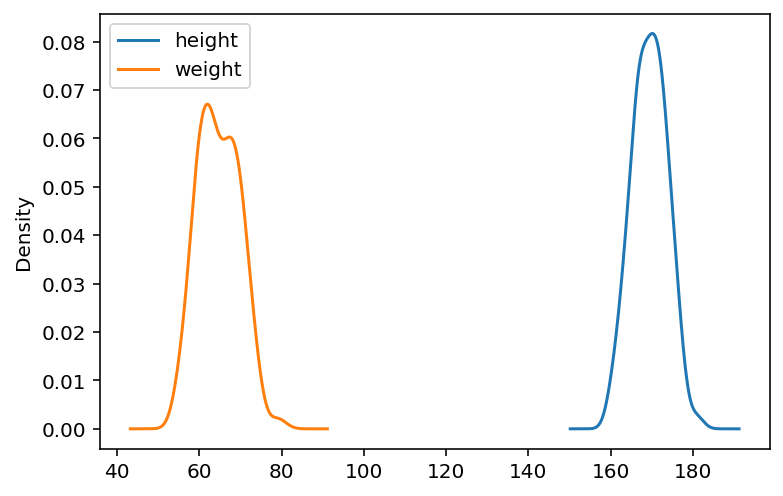

In [20]:
df.plot.kde()

# 데이터 클리닝

##  결측치 처리
- 값이 비어 있는 것을 처리하는 것 (파이썬에서는 빈 값이 nan으로 표시된다: not a number)
- 결측치를 처리하는 방법은 크게 세 가지가 있다
 - 결측치가 포함된 샘플(행)을 버린다
 - 결측치를 적절한 값으로 대체한다
 - 결측치 처리를 다음 분석 단계로 넘긴다. 즉, 결측치를 그대로 둔다
 
##  틀린값 처리
- 틀린값을 처리하는 방법도 결측치를 처리하는 방법과 같이 세가지이다
 - 틀린 값이 포함된 샘플(행)을 버린다
 - 틀린 값을 적절한 값으로 대체한다
 - 틀린값 처리를 다음 분석 단계로 넘긴다. 즉, 틀린값을 그대로 둔다

## 결측치 처리 실습

- 결측치 확인은 np.isnull() 사용
- 결측치 치환은 np.fillna() 사용

In [21]:
df[:5]

,height,weight
0,173.72,73.80
1,163.76,55.20
2,168.20,62.60
3,174.28,55.90
4,174.52,69.65


In [22]:
# 임의의 값 하나를 결측치로 변경
df['weight'][2] = np.nan
df[:5]

,height,weight
0,173.72,73.80
1,163.76,55.20
2,168.20,NaN
3,174.28,55.90
4,174.52,69.65


In [23]:
# 컬럼별 결측치 갯수 보기
df.isnull().sum()

height    0
weight    1
dtype: int64

### 결측치가 있는 행 삭제

In [24]:
# 결측치가 있는 행(샘플) 삭제하기
df2 = df.dropna()
print(df2.shape)
df2[:5]

(99, 2)


,height,weight
0,173.72,73.80
1,163.76,55.20
3,174.28,55.90
4,174.52,69.65
5,167.52,70.45


### 결측치 대체

In [25]:
# 결측치를 다른 값으로 대체하기 (아래는 몸무게 컬럼의 평균치로 대체한 예)
print(df['weight'].mean())
df3 = df.fillna(df['weight'].mean())
print(df3.shape)
df3[:5]

64.7459595959596
(100, 2)


,height,weight
0,173.72,73.80000
1,163.76,55.20000
2,168.20,64.74596
3,174.28,55.90000
4,174.52,69.65000


In [26]:
# 결측치를 0으로 대체하는 경우
df.fillna(0)[:5]

,height,weight
0,173.72,73.80
1,163.76,55.20
2,168.20,0.00
3,174.28,55.90
4,174.52,69.65


In [27]:
# 결측치를 바로 이전 값으로 대체하는 경우 (forward fill)
# 다음 값으로 대체하려면 bfill 사용
df.fillna(method="ffill")[:5]

,height,weight
0,173.72,73.80
1,163.76,55.20
2,168.20,55.20
3,174.28,55.90
4,174.52,69.65


## (연습) 키에 2개, 몸무게에 1개 결측치를 만들고 이를 평균치로 대체하시오
- 서로 다른 행에 키와 몸무게에 결측치를 하나씩 추가하고 이를 확인
- 결측치를 모두 찾아 평균치로 대체

In [77]:
# (풀이)



# 스케일링
- 여러 변수 값의 범위가 서로 다른 경우 데이터 분석에서 동일한 비중으로 반영하기 위해서는 동일한 범위를 갖도록 변환해야 한다 (예: 과목 성적 100점 만점으로 환산)
- 표준 스케일링을 가장 많이 사용한다 (평균이 0, 표준편차가 1이 되도록 변환)
- 값의 최소치와 최대치가 정해진 경우는 min-max 스케링일도 자주 사용된다 (최소치를 0으로, 최대치를 1로)

## 표준 스케일링


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-05%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%208.52.14.png?raw=1" width=140  align='left'>

In [48]:
df = df_raw.copy()
df[:5]

,height,weight
0,174.20,64.40
1,164.44,59.15
2,174.04,68.20
3,167.24,65.90
4,164.88,63.45


In [32]:
# 키, 몸무게 데이터를 각각 표준 스케일링한 후 컬럼에 추가
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df[['h_sc','w_sc']]=scale.fit_transform(df[['height','weight']])
df[:5]

,height,weight,h_sc,w_sc
0,174.20,64.40,0.964195,-0.098081
1,164.44,59.15,-1.520634,-1.264386
2,174.04,68.20,0.923460,0.746102
3,167.24,65.90,-0.807773,0.235149
4,164.88,63.45,-1.408613,-0.309126


In [33]:
scale.mean_

array([170.4128,  64.8415])

In [34]:
scale.mean_, scale.scale_

(array([170.4128,  64.8415]), array([3.92783658, 4.50139453]))

- 스케일링 이전의 원래 값으로 환원하는 방법
- inverse_transform을 사용한다

In [35]:
# 원래 값 보기
scale.inverse_transform(df[["h_sc","w_sc"]])[:5]

array([[174.2 ,  64.4 ],
       [164.44,  59.15],
       [174.04,  68.2 ],
       [167.24,  65.9 ],
       [164.88,  63.45]])

<AxesSubplot:ylabel='Density'>

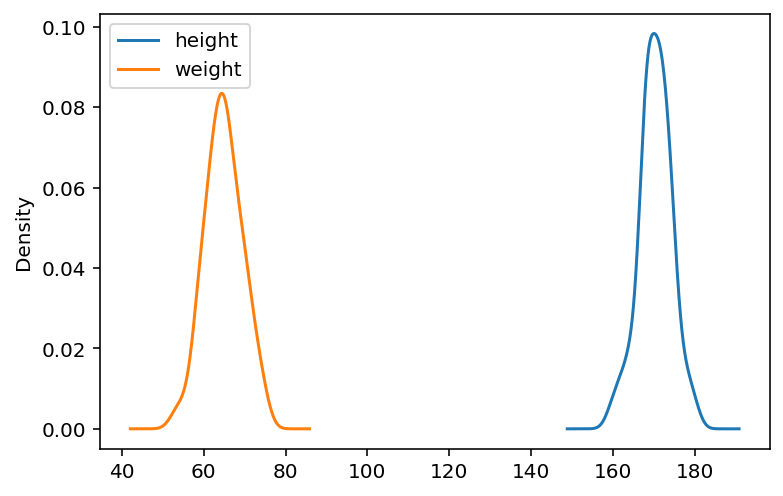

In [36]:
# 원래 키, 몸무게의 데이터의 확률 분포 보기 (kernel density estimate 함수 사용)
df[["height","weight"]].plot.kde()

<AxesSubplot:ylabel='Density'>

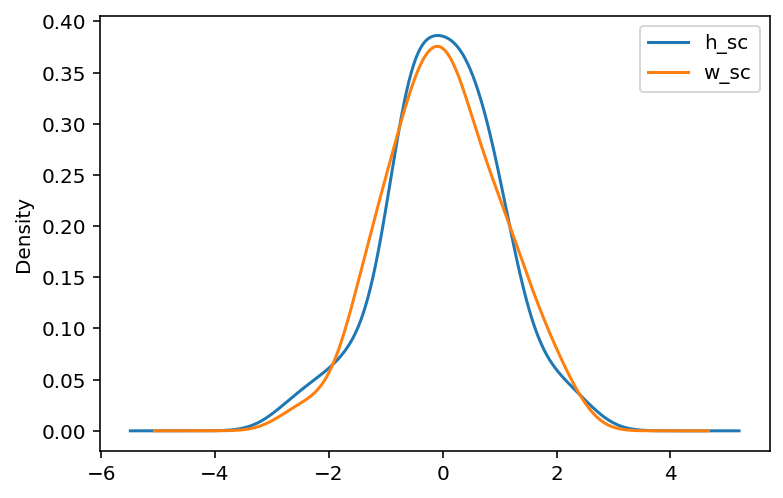

In [38]:
# 표준 스케일링된 데이터의 확률 분포 보기
df[["h_sc","w_sc"]].plot.kde()

## Min-Max 스케일링
- 데이터의 최소값이 0, 최대값이 1이 되도록 조정

In [39]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df[['h_mima','w_mima']]=minmax.fit_transform(df[['height','weight']])
df[:5]

,height,weight,h_sc,w_sc,h_mima,w_mima
0,174.20,64.40,0.964195,-0.098081,0.706667,0.520548
1,164.44,59.15,-1.520634,-1.264386,0.241905,0.280822
2,174.04,68.20,0.923460,0.746102,0.699048,0.694064
3,167.24,65.90,-0.807773,0.235149,0.375238,0.589041
4,164.88,63.45,-1.408613,-0.309126,0.262857,0.477169


<AxesSubplot:ylabel='Density'>

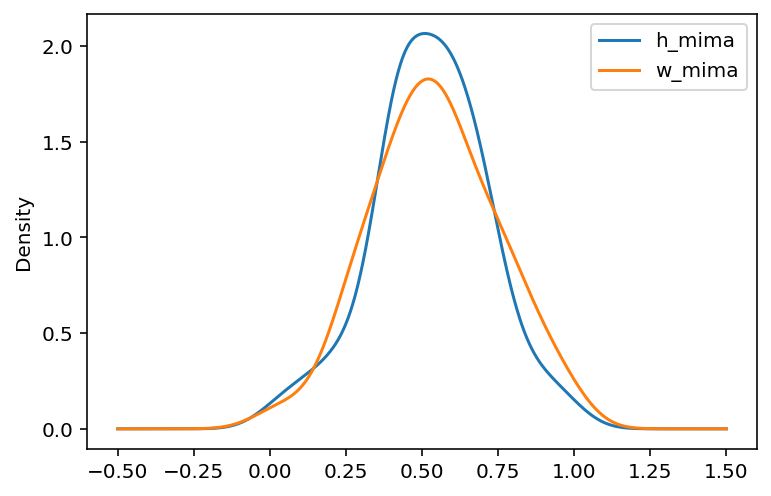

In [40]:
# min-max 스케일링 된 데이터의 확률 분포
df[["h_mima","w_mima"]].plot.kde()

- 위의 결과를 보면 표준 스케일링과 min-max 스케일링이 별 차이가 없다
- 그러나 이상치가 있을 때는 두 스케일링 결과 값의 변화 정도가 크게 다르다

In [41]:
# 이상치가 포함된 키 데이터 생성: height_1
# 첫번째 샘플의 키 값을 임의로 200 을로 변경
height_1 = height.copy()
height_1[0] = 200

In [42]:
df["height_1"] = height_1
df[:3]

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1
0,174.20,64.40,0.964195,-0.098081,0.706667,0.520548,200.00
1,164.44,59.15,-1.520634,-1.264386,0.241905,0.280822,164.44
2,174.04,68.20,0.923460,0.746102,0.699048,0.694064,174.04


In [43]:
# 이상치가 포함된 데이터(컬럼)에 표준 스케일링을 적용
df['h_1_sc']=scale.fit_transform(df[['height_1']])
df[:3]

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1,h_1_sc
0,174.20,64.40,0.964195,-0.098081,0.706667,0.520548,200.00,5.990302
1,164.44,59.15,-1.520634,-1.264386,0.241905,0.280822,164.44,-1.272601
2,174.04,68.20,0.923460,0.746102,0.699048,0.694064,174.04,0.688138


<AxesSubplot:ylabel='Density'>

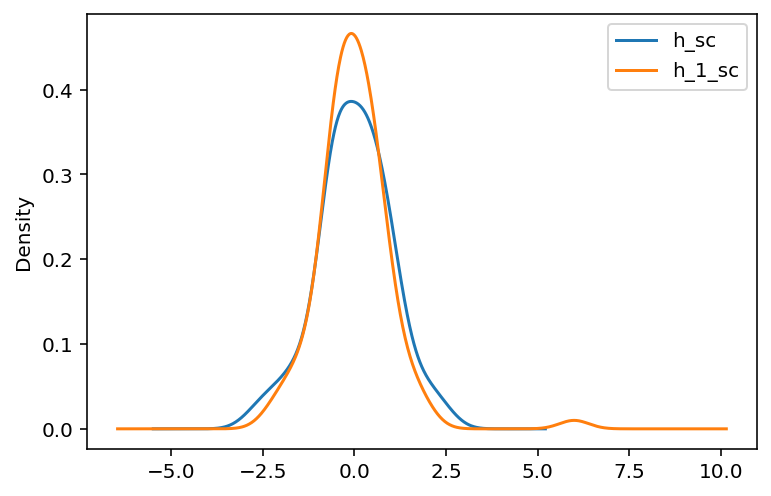

In [44]:
# 이상치가 있더라도 "표준 스케일링" 데이터의 다른 값의 분포는 거의 변화가 없다
# 한 샘플 추가로 인해 전체 평균과 표준편차가 거의 변하지 않으므로
df[['h_sc','h_1_sc']].plot.kde()

In [45]:
# 이상치가 있는 데이터에 nim-max 스케일링을 적용
df['h_1_mima']=minmax.fit_transform(df[['height_1']])
df[:3]

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1,h_1_sc,h_1_mima
0,174.20,64.40,0.964195,-0.098081,0.706667,0.520548,200.00,5.990302,1.00000
1,164.44,59.15,-1.520634,-1.264386,0.241905,0.280822,164.44,-1.272601,0.12500
2,174.04,68.20,0.923460,0.746102,0.699048,0.694064,174.04,0.688138,0.36122


<AxesSubplot:ylabel='Density'>

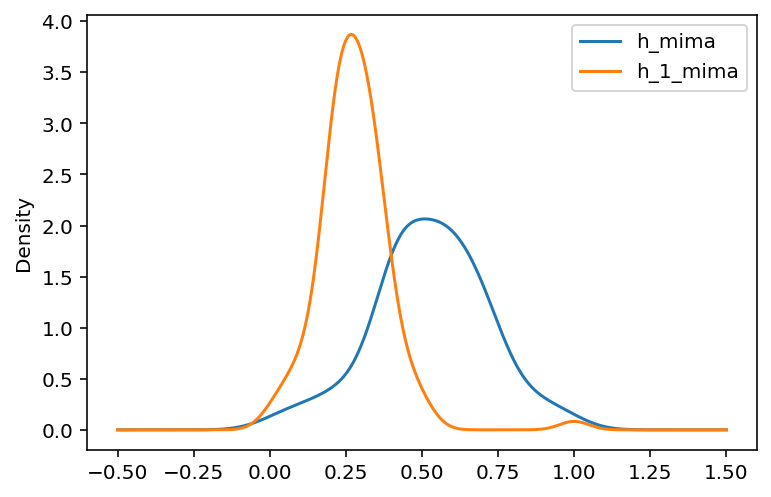

In [46]:
# 이상치 하나 때문에 min-max 스케일링 데이터의 다른 값들이 크게 달라진다
# 크거나 작은 단 한개의 샘플 추가로도 다른 샘플들의 값이 크게 달라질 수 있다
# 여기서는 200인 키의 값이 1로 환산되었다

df[['h_mima','h_1_mima']].plot.kde()

## 스케일링에서 fit()과 transform()을 나누어 실행
 - fit() 또는 fit_transform()에서 만든 스케일링 조건(평균, 표준편차, 최대값, 최소값 등)을 저장해두고, 이를 사용해서 다른 데이터에 대해서는 transform()만 실행할 수 있다.

## (연습) - 키에 이상치가 없는 데이터로는 fit_transform()을 실행하고 이상치가 있는 데이터에 대해서는 transform()만 수행하시오
- minmax 스케일링만 수행한다
- 새로운 데이터는 (0~1) 의 범위를 벗어나는 스케일링 값이 나올 수 있다
- 이들의 확률 분포를 비교한다

In [76]:
# (풀이)



# 이상치 처리
- 이상치 처리의 목적은 두가지 이다
 - 1) 이상치를 제거하여 데이터 분석의 정확도를 높이려는 경우
 - 2) 이상치를 찾는 것 자체가 목적인 경우 (outlier detection)  
 
- 아래는 모두 같은 상관계수를 같는 데이터 셋이다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.47.02.png?raw=1" width=400 align='left'>

## 이상치 탐지
 - boxplot()을 보면 이상치 존재를 파악하기 쉽다
 - 표준 스케일링 한 후 값이 큰 것들 (예 6 이상)을 찾는 방법이 일반적이다

<AxesSubplot:>

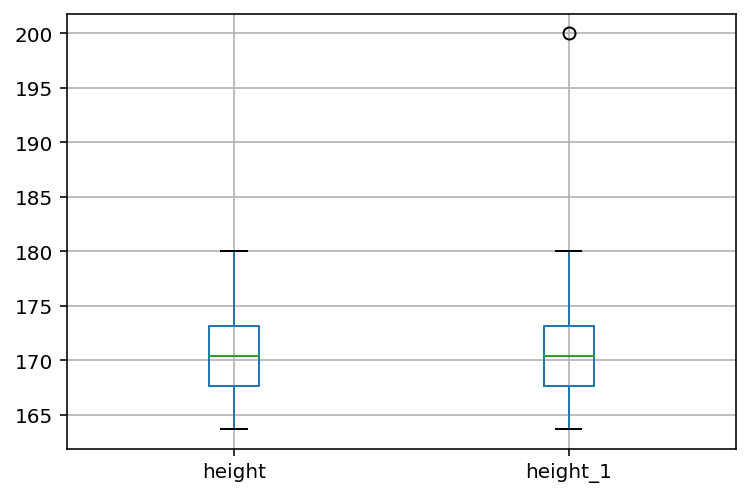

In [26]:
# 이상치가 없는 경우와 있는 경우의 박스 플롯
df[["height", "height_1"]].boxplot()

<AxesSubplot:>

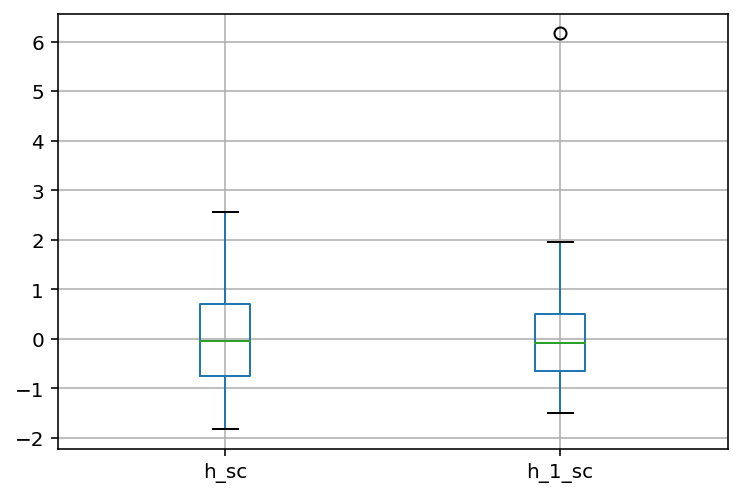

In [27]:
# 스케일링된 데이터를 비교하기 (키 2m인 사람은 7 시그마 밖에 존재: 4cm x 7 = 28cm)
df[["h_sc", "h_1_sc"]].boxplot()

# 데이터 변환
- 로그변환
- 역수변환
- 지수변환
- 카테고리 인코딩
- 원 핫 인코딩

## 로그 변환

- 어떤 변수는 로그를 취해야 입출력 관계에서 선형적인 변화(효과)를 표현하는 경우가 있다
- 예: 돈, 생물학적 자극과 반응 관계 (청각, 미각, 후각, 압력 등)
- 데이터 분석에서는 입출력 관계가 선형적일 때 가장 잘 예측할 수 있다 (선형적일수록 예측이 잘 된다)

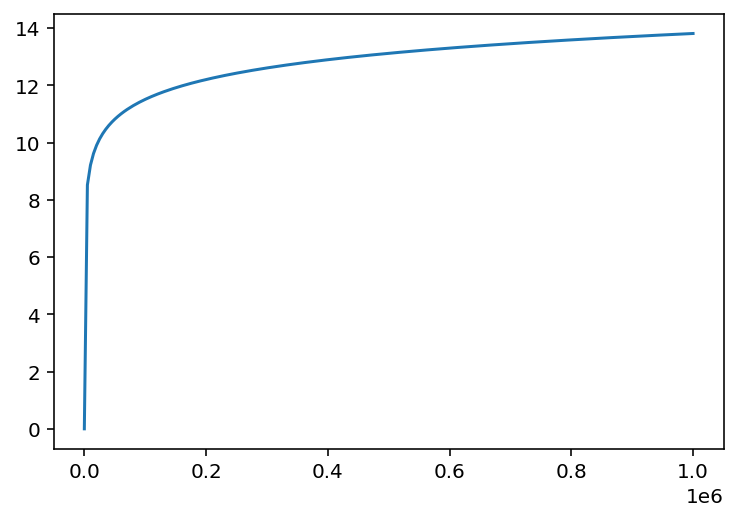

In [28]:
# 돈의 수입과 만족도의 관계는 대체로 로그 함수를 따른다 (생물학적 반응)
# (해석) 로그 함수의 기울기는 1/x 이다. 즉 만족도 증가는 현재 가진 돈의 크기에 반비례한다
x = np.linspace(1,1000000, 200)
y = np.log(x)
plt.plot(x,y)

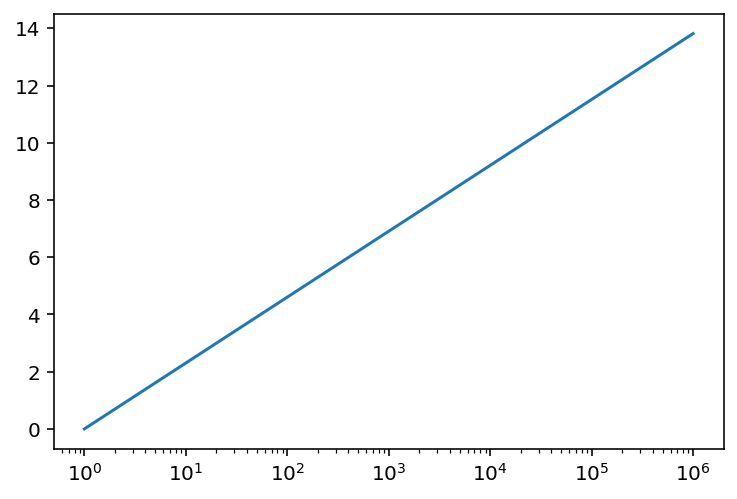

In [29]:
# x 축을 로그 스케일로 그리면 (로그를 취하면) 입출력 관계가 선형적이 된다
plt.xscale('log')
plt.plot(x,y)

### log-normal 분포

- 어떤 값에 로그를 취하면 정규분포를 갖는 특성의 데이터 (예: 국가별 수출액 분포)


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.49.30.png?raw=1" width=400 align='left'>

## 카테고리 인코딩

- 연속형 숫자 데이터를 카테고리형(범주형)으로 바꾸는 것
- (예) 시험점수, 등수 차이만으로는 학생의 실력 차이를 파악하기 어렵다
 - 3점 차이
 - 3등 차이
 - 3등급 차이 (등급 차이는 실력차이를 선형적으로 표현한다)

- 입력 값의 변화가 선형적(linear)인 효과를 나타낼 때 예측에 도움이 된다
- 내신성적 9등급제는 정규분포를 0.5 시그마 간격으로 (등간격으로) 나눈 것 (총 4.5 시그마 범위)


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.48.55.png?raw=1" width=400 align='left'>

# 정답

## (연습) 키에 2개, 몸무게에 1개 결측치를 만들고 이를 평균치로 대체하시오
- 서로 다른 행에 키와 몸무게에 결측치를 하나씩 추가하고 이를 확인
- 결측치를 모두 찾아 평균치로 대체

In [56]:
df = df_raw.copy()
df['height'][1:3] = np.nan
df['weight'][3] = np.nan
df[:5]

,height,weight
0,174.20,64.40
1,NaN,59.15
2,NaN,68.20
3,167.24,NaN
4,164.88,63.45


In [58]:
df.isnull().sum()

height    2
weight    1
dtype: int64

In [57]:
df3 = df.fillna(df.mean())
df3[:5]

,height,weight
0,174.200000,64.400000
1,170.436735,59.150000
2,170.436735,68.200000
3,167.240000,64.830808
4,164.880000,63.450000


## (연습) - 키에 이상치가 없는 데이터로는 fit_transform()을 실행하고 이상치가 있는 데이터에 대해서는 transform()만 수행하시오
- minmax 스케일링만 수행한다
- 새로운 데이터는 (0~1) 의 범위를 벗어나는 스케일링 값이 나올 수 있다
- 이들의 확률 분포를 비교한다

In [72]:
df = df_raw.copy()
minmax = MinMaxScaler()
df['h_mima']=minmax.fit_transform(df[['height']])
df[:5]

,height,weight,h_mima
0,174.20,64.40,0.706667
1,164.44,59.15,0.241905
2,174.04,68.20,0.699048
3,167.24,65.90,0.375238
4,164.88,63.45,0.262857


In [73]:
height_1 = height.copy()
height_1[0] = 200
df["height_1"] = height_1
df[:3]

,height,weight,h_mima,height_1
0,174.20,64.40,0.706667,200.00
1,164.44,59.15,0.241905,164.44
2,174.04,68.20,0.699048,174.04


<AxesSubplot:ylabel='Density'>

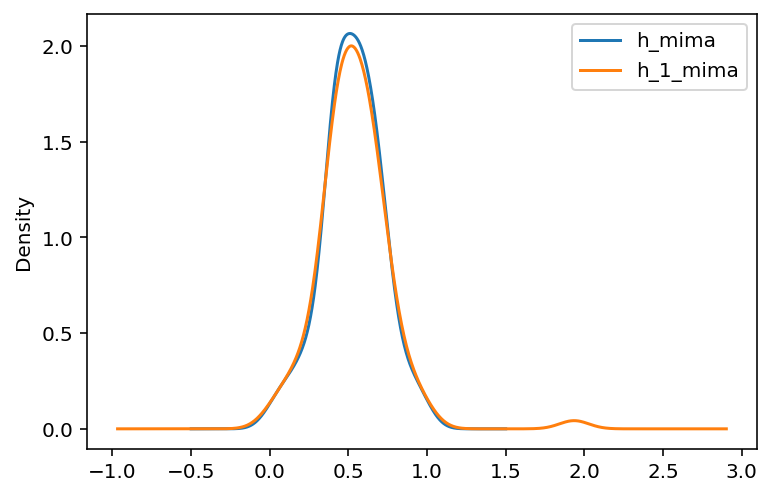

In [74]:
# 이상치가 있는 데이터에 nim-max 스케일링을 적용하되 transform()을 사용
df['h_1_mima']=minmax.transform(df[['height_1']])
df[['h_mima','h_1_mima']].plot.kde()

In [75]:
# h_1_mima를 보면 1이 넘는 값이 들어 있다
df[:5]

,height,weight,h_mima,height_1,h_1_mima
0,174.20,64.40,0.706667,200.00,1.935238
1,164.44,59.15,0.241905,164.44,0.241905
2,174.04,68.20,0.699048,174.04,0.699048
3,167.24,65.90,0.375238,167.24,0.375238
4,164.88,63.45,0.262857,164.88,0.262857
